# EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('/content/titanic.csv')

### Basic Data Overview

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Pair Plot for Titanic Dataset

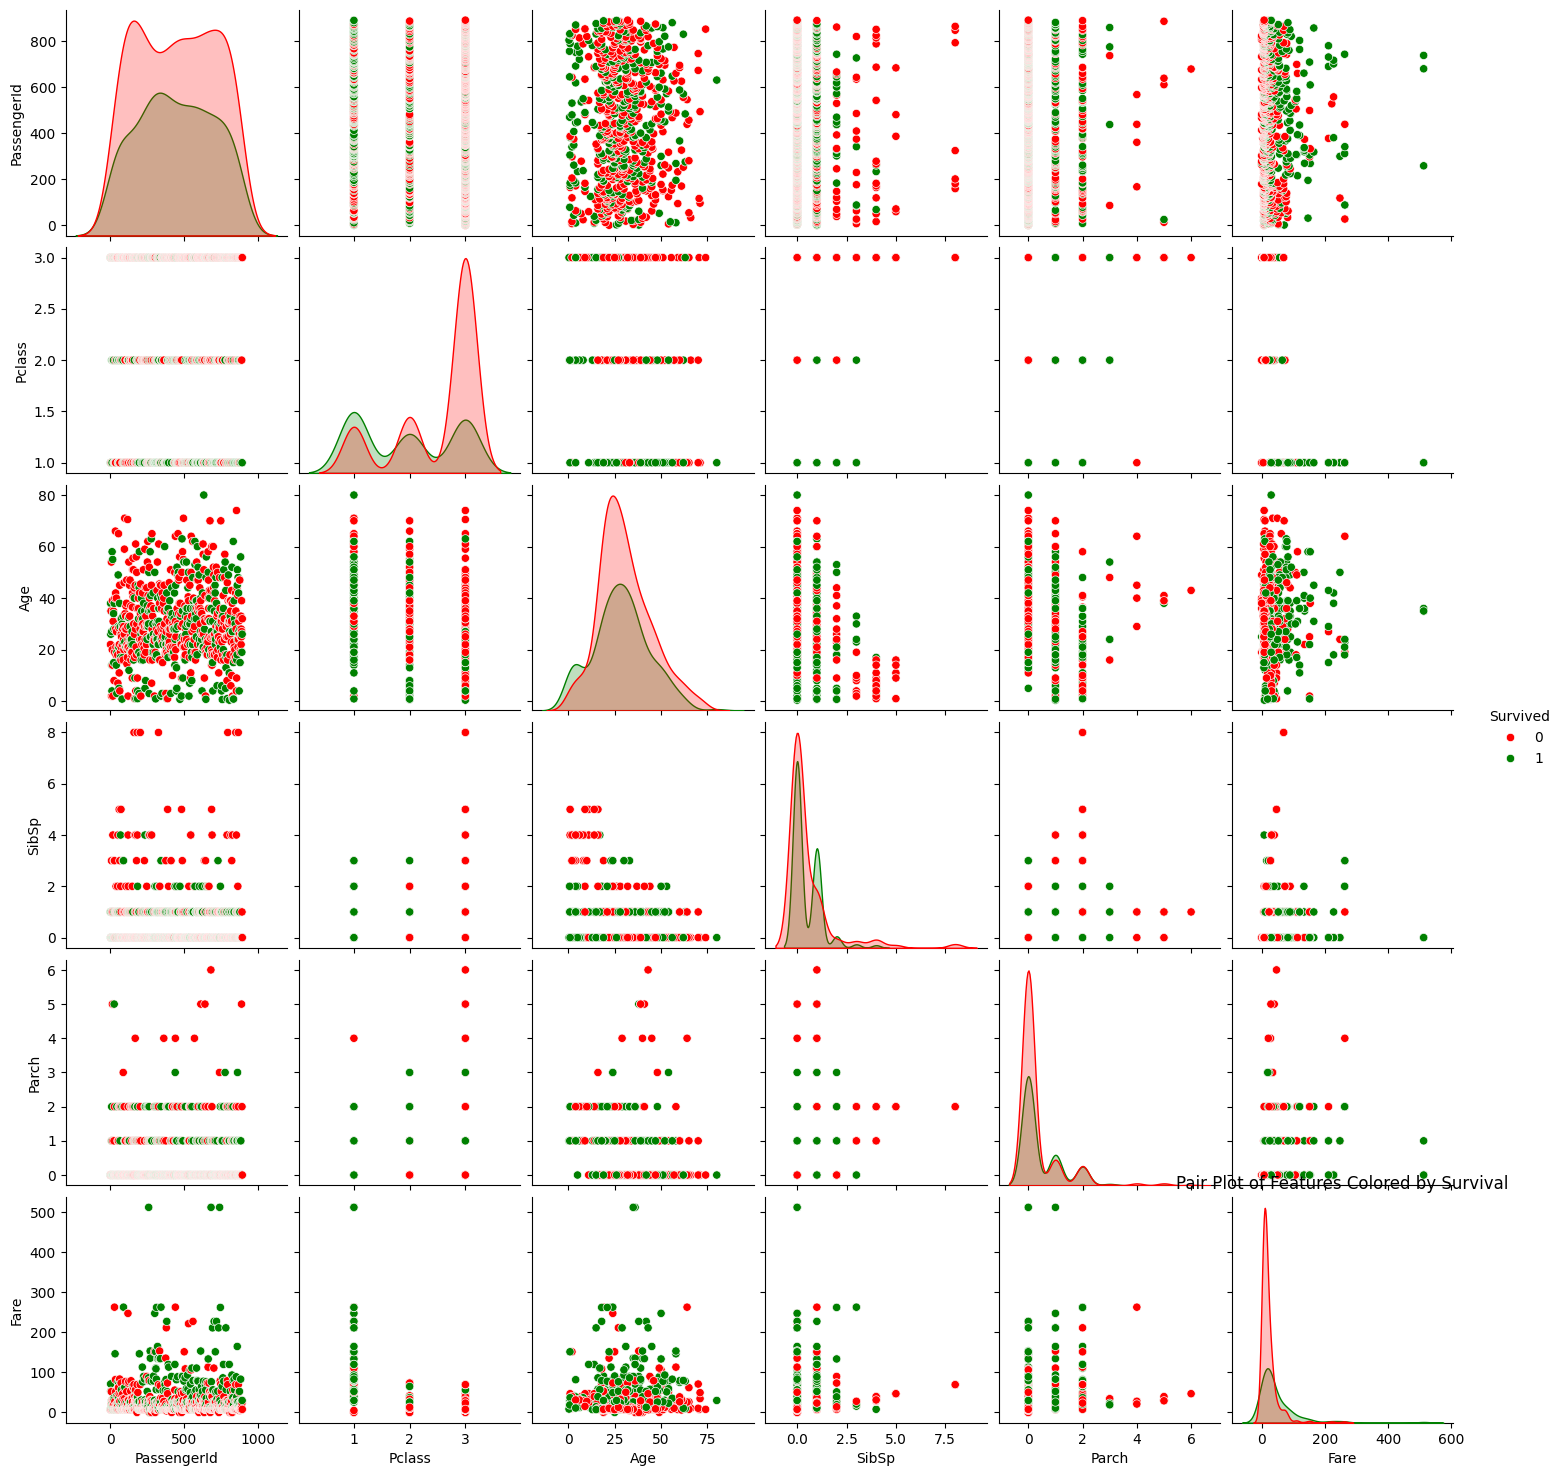

In [ ]:
sns.pairplot(df, hue='Survived', palette={0: 'red', 1: 'green'}, diag_kind='kde')
plt.title('Pair Plot of Features Colored by Survival')
plt.show()

### Handling Missing Values

In [ ]:
print("Missing Values Before Handling:\n", df.isna().sum())

Missing Values Before Handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.drop(columns=['Cabin'], inplace=True)  # Drop sparse column

In [ ]:
print("\nMissing Values After Handling:\n", df.isna().sum())


Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df['IsAlone'] = (df['FamilySize']==1).astype(int)

In [ ]:
df.drop(columns=['SibSp', 'Parch'])

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,2.110213,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,4.280593,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,2.188856,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,3.990834,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,2.202765,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,2.639057,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,3.433987,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,W./C. 6607,3.196630,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,3.433987,C,1,1


### Drop Irrelevant Columns

In [ ]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

### Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

### Correlation Matrix

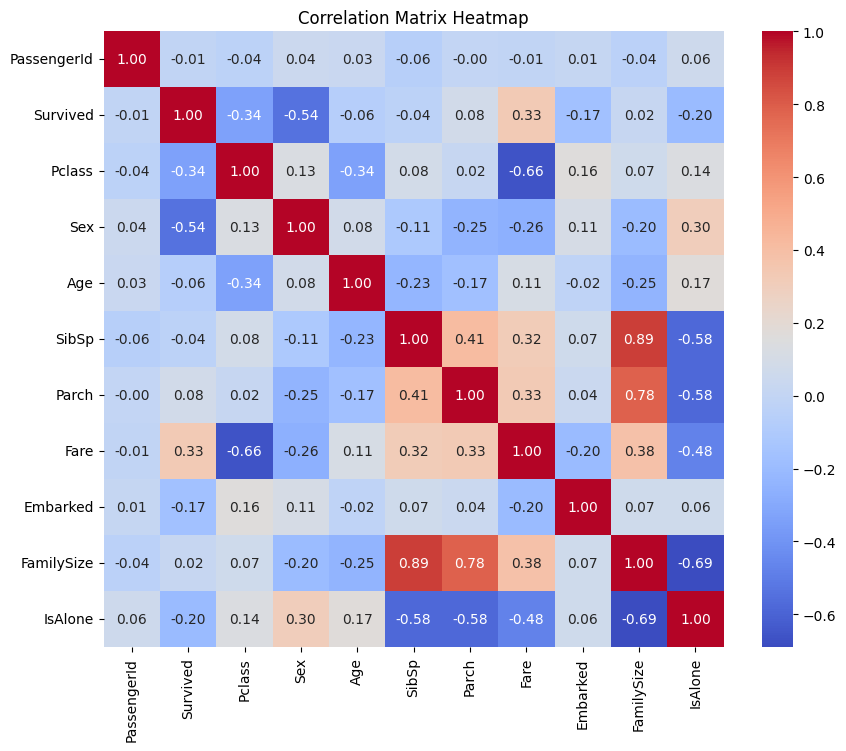

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

### Feature Scaling

In [ ]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

### Final Dataset Overview

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1 -0.565736      1      0 -0.879741   
1            2         1       1    0  0.663861      1      0  1.361220   
2            3         1       3    0 -0.258337      0      0 -0.798540   
3            4         1       1    0  0.433312      1      0  1.062038   
4            5         0       3    1  0.433312      0      0 -0.784179   

   Embarked  FamilySize  IsAlone  
0         2           2        0  
1         0           2        0  
2         2           1        1  
3         2           2        0  
4         2           1        1  


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Sex           Age  \
count   891.000000  891.000000  891.000000  891.000000  8.910000e+02   
mean    446.000000    0.383838    2.308642    0.647587  2.272780e-16   
std     257.353842    0.486592    0.836071    0.477990  1.000562e+00   
min       1.000000    0.000000    1.000000    0.000000 -2.224156e+00   
25%     223.500000    0.000000    2.000000    0.000000 -5.657365e-01   
50%     446.000000    0.000000    3.000000    1.000000 -1.046374e-01   
75%     668.500000    1.000000    3.000000    1.000000  4.333115e-01   
max     891.000000    1.000000    3.000000    1.000000  3.891554e+00   

            SibSp       Parch          Fare    Embarked  FamilySize  \
count  891.000000  891.000000  8.910000e+02  891.000000  891.000000   
mean     0.523008    0.381594 -1.714553e-16    1.536476    1.904602   
std      1.102743    0.806057  1.000562e+00    0.791503    1.613459   
min      0.000000    0.000000 -3.058578e+00    0.000000    1.000000

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB
None


# Normalization

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Load Titanic Dataset

In [ ]:
df = pd.read_csv('/content/titanic.csv')

### Preview Dataset

In [ ]:
print("Original Titanic Dataset:\n", df.head())

Original Titanic Dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450  

### Handling Missing Values

In [ ]:
print("Missing Values Before Handling:\n", df.isna().sum())

Missing Values Before Handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.drop(columns=['Cabin'], inplace=True)  # Drop sparse column

In [ ]:
print("\nMissing Values After Handling:\n", df.isna().sum())


Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Binning for Noise Handling

In [ ]:
# Original 'Age' column for comparison
age_column = df['Age']

# Equal-Width Binning for Smoothing
bins = pd.cut(age_column, bins=4)  # Divide 'Age' into 4 equal-width bins
df['Age_Smoothed_Mean'] = age_column.groupby(bins).transform('mean')  # Replace with mean
df['Age_Smoothed_Median'] = age_column.groupby(bins).transform('median')  # Replace with median

# Smoothing by Bin Boundaries
def smooth_bin_boundaries(value, bin_intervals):
    for interval in bin_intervals:
        if value >= interval.left and value <= interval.right:
            return interval.left if abs(value - interval.left) < abs(value - interval.right) else interval.right

bin_intervals = pd.cut(age_column, bins=4).cat.categories
df['Age_Smoothed_Boundaries'] = age_column.apply(lambda x: smooth_bin_boundaries(x, bin_intervals))

<ipython-input-18-8f3b692dca4c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age_Smoothed_Mean'] = age_column.groupby(bins).transform('mean')  # Replace with mean
<ipython-input-18-8f3b692dca4c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age_Smoothed_Median'] = age_column.groupby(bins).transform('median')  # Replace with median



Smoothed Age Columns:
    Age  Age_Smoothed_Mean  Age_Smoothed_Median  Age_Smoothed_Boundaries
0  22.0          28.890569                 28.0                   20.315
1  38.0          28.890569                 28.0                   40.210
2  26.0          28.890569                 28.0                   20.315
3  35.0          28.890569                 28.0                   40.210
4  35.0          28.890569                 28.0                   40.210


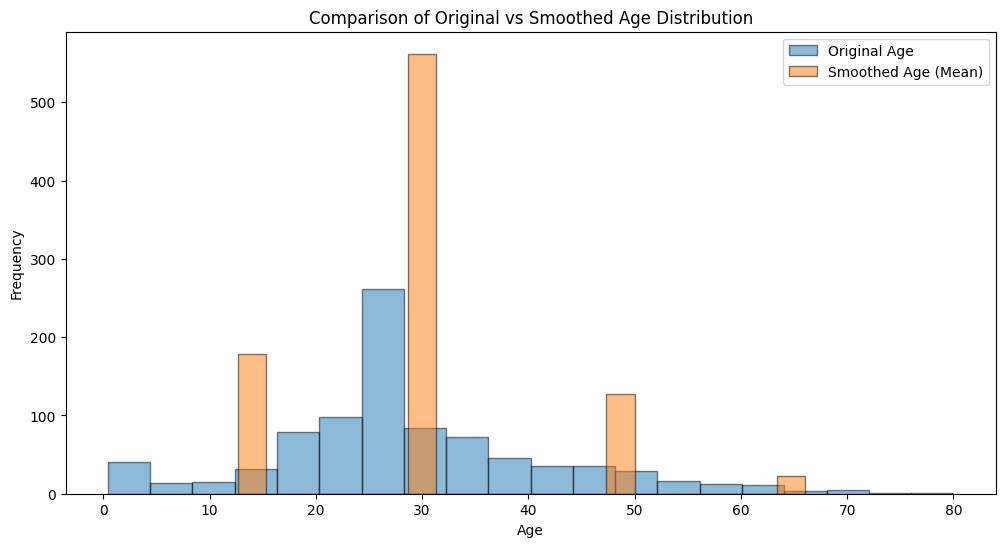

In [ ]:
# View Smoothed Columns
print("\nSmoothed Age Columns:")
print(df[['Age', 'Age_Smoothed_Mean', 'Age_Smoothed_Median', 'Age_Smoothed_Boundaries']].head())

# Visualizing the Smoothed Data
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=20, alpha=0.5, label='Original Age', edgecolor='k')
plt.hist(df['Age_Smoothed_Mean'], bins=20, alpha=0.5, label='Smoothed Age (Mean)', edgecolor='k')
plt.legend()
plt.title('Comparison of Original vs Smoothed Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Min-Max Normalization (e.g., Age)

In [ ]:
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
df['Age_MinMax'] = scaler_minmax.fit_transform(df[['Age']])

### Z-Score Normalization (e.g., Fare)

In [ ]:
scaler_zscore = StandardScaler()
df['Fare_ZScore'] = scaler_zscore.fit_transform(df[['Fare']])

### Decimal Scaling (e.g., Fare)

In [ ]:
def decimal_scaling(column):
    max_abs_value = np.max(np.abs(column))
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_value))
    return column / scaling_factor

df['Fare_Decimal'] = decimal_scaling(df['Fare'])

# Apriori

## 1

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Example dataset
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'jam'],
    ['milk', 'bread', 'butter', 'jam']
]

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_data = te.fit_transform(dataset)
df = pd.DataFrame(te_data, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Add the 'num_itemsets' parameter for older versions of mlxtend
rules = association_rules(
    frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=len(frequent_itemsets)
)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
    support               itemsets
0      1.00                (bread)
1      0.75               (butter)
2      0.75                  (jam)
3      0.75                 (milk)
4      0.75        (butter, bread)
5      0.75           (jam, bread)
6      0.75          (milk, bread)
7      0.50          (butter, jam)
8      0.50         (butter, milk)
9      0.50            (milk, jam)
10     0.50   (butter, jam, bread)
11     0.50  (butter, milk, bread)
12     0.50     (milk, jam, bread)

Association Rules:
       antecedents     consequents  antecedent support  consequent support  \
0         (butter)         (bread)                0.75                1.00   
1          (bread)        (butter)                1.00                0.75   
2            (jam)         (bread)                0.75                1.00   
3          (bread)           (jam)                1.00                0.75   
4           (milk)         (bread)                0.75                1.00   
5  

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## 2

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Sample one-hot encoded dataset
data = {
    'milk': [1, 0, 1, 1, 0],
    'bread': [1, 1, 1, 0, 1],
    'butter': [0, 1, 0, 1, 1],
    'eggs': [1, 0, 1, 1, 0],
    'cheese': [0, 1, 1, 0, 1]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Generate frequent itemsets
min_support = 0.6  # Minimum support threshold
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=len(frequent_itemsets))

# Display results
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
   support         itemsets
0      0.6           (milk)
1      0.8          (bread)
2      0.6         (butter)
3      0.6           (eggs)
4      0.6         (cheese)
5      0.6     (milk, eggs)
6      0.6  (cheese, bread)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0      (milk)      (eggs)                 0.6                 0.6      0.6   
1      (eggs)      (milk)                 0.6                 0.6      0.6   
2    (cheese)     (bread)                 0.6                 0.8      0.6   
3     (bread)    (cheese)                 0.8                 0.6      0.6   

   confidence      lift  representativity  leverage  conviction  \
0        1.00  1.666667               1.0      0.24         inf   
1        1.00  1.666667               1.0      0.24         inf   
2        1.00  1.250000               1.0      0.12         inf   
3        0.75  1.250000               1.0      0.12         1.6   

   zhangs_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 3

In [ ]:
from itertools import combinations


# Transaction data as a list of lists
transactions = [
    ['1', '3', '4'],
    ['2', '3', '5'],
    ['1', '2', '3', '5'],
    ['2', '5']
]


# Function to get unique items from transactions
def get_unique_items(transactions):
    items = set()
    for transaction in transactions:
        for item in transaction:
            items.add(item)
    return items


items = get_unique_items(transactions)
print(items)


In [ ]:
# Generate Candidate Itemsets
def generate_candidates(itemset, length):
    return list(combinations(itemset, length))


h = generate_candidates(items, 2)
print(h)


In [ ]:
# Calculate Support for Itemsets
# Function to calculate the support of an itemset
def calculate_support(transactions, itemsets):
    support_count = {}
    for itemset in itemsets:
        support_count[itemset] = 0
        for transaction in transactions:
            if set(itemset).issubset(set(transaction)):
                support_count[itemset] += 1
    return support_count


# Define minimum support threshold (e.g., 2 occurrences)
min_support = 2

# Prune Itemsets Based on Minimum Support
def prune_itemsets(support_count, min_support):
    frequent_itemsets = []
    for itemset, count in support_count.items():
        if count >= min_support:
            frequent_itemsets.append(itemset)
    return frequent_itemsets

# Implement the Apriori Algorithm
def apriori(transactions, min_support):
    # Step 1: Get unique items from the transactions
    items = get_unique_items(transactions)


    # Step 2: Initialize variables
    length = 1
    frequent_itemsets = []


    prev_freq_itemset = None
    # Step 3: Generate candidate itemsets of increasing lengths
    while True:
        if length == 1:
            candidates = generate_candidates(items, length)
        else:
            candidates = generate_candidates(set.union(*[set(item) for item in frequent_itemsets]), length)


        # Step 4: Calculate the support of candidate itemsets
        support_count = calculate_support(transactions, candidates)


        # Step 5: Prune itemsets that do not meet min support
        frequent_itemsets = prune_itemsets(support_count, min_support)


        # If no frequent itemsets found, stop
        if not frequent_itemsets:
            return prev_freq_itemset
        prev_freq_itemset = frequent_itemsets
        # Print frequent itemsets for this round
        print(f"Frequent {length}-itemsets:", frequent_itemsets)


        # Move to the next length
        length += 1
    return frequent_itemsets


# Run the Apriori algorithm on our transaction dataset
freq_itemset = apriori(transactions, min_support)


In [ ]:
# Generate Association Rules
# Function to generate association rules from frequent itemsets
def generate_association_rules(frequent_itemsets, transactions, min_confidence=0.7):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                antecedents = list(combinations(itemset, i))
                for antecedent in antecedents:
                    consequent = tuple(set(itemset) - set(antecedent))
                    antecedent_support = sum([1 for t in transactions if set(antecedent).issubset(set(t))])
                    itemset_support = sum([1 for t in transactions if set(itemset).issubset(set(t))])
                    confidence = itemset_support / antecedent_support if antecedent_support != 0 else 0
                    if confidence >= min_confidence:
                        rules.append((antecedent, consequent, confidence))
    return rules


# Generate rules with min confidence threshold
rules = generate_association_rules(apriori(transactions, min_support), transactions, min_confidence=0.7)
for rule in rules:
    print(f"Rule: {rule[0]} -> {rule[1]} (confidence: {rule[2]:.2f})")


# Decision Tree(ID3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd


# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Separate features and target label
# Modify 'label' to your actual target column name
X = df.drop(columns=['Species', 'Id'])  # Drop the target column to get features
y = df['Species']  # Target column

In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ID3 Algorithm using Entropy
id3_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = id3_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("ID3 Decision Tree Accuracy (using entropy):", accuracy)

ID3 Decision Tree Accuracy (using entropy): 1.0


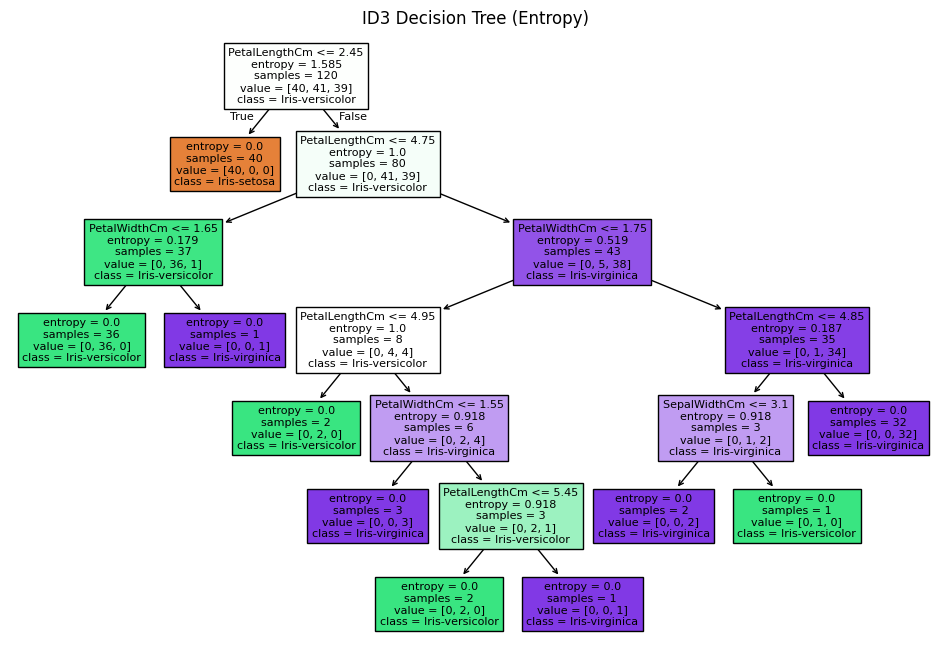

In [ ]:
# Get unique class names from the target column
class_names = list(y.unique())  # This will provide the unique labels in your dataset

# ID3 Tree Visualization
plt.figure(figsize=(12,8))
tree.plot_tree(id3_clf, feature_names=X.columns, class_names=[str(c) for c in class_names], filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.show()

# Decision Tree(CART)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd


# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Separate features and target label
# Modify 'label' to your actual target column name
X = df.drop(columns=['Species', 'Id'])  # Drop the target column to get features
y = df['Species']  # Target column

In [ ]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement CART (using Gini Index)
cart_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_clf.fit(X_train, y_train)

# Predict and evaluate CART
y_pred_cart = cart_clf.predict(X_test)
accuracy_cart = accuracy_score(y_test, y_pred_cart)
print("CART Decision Tree Accuracy (using gini index):", accuracy_cart)

CART Decision Tree Accuracy (using gini index): 1.0


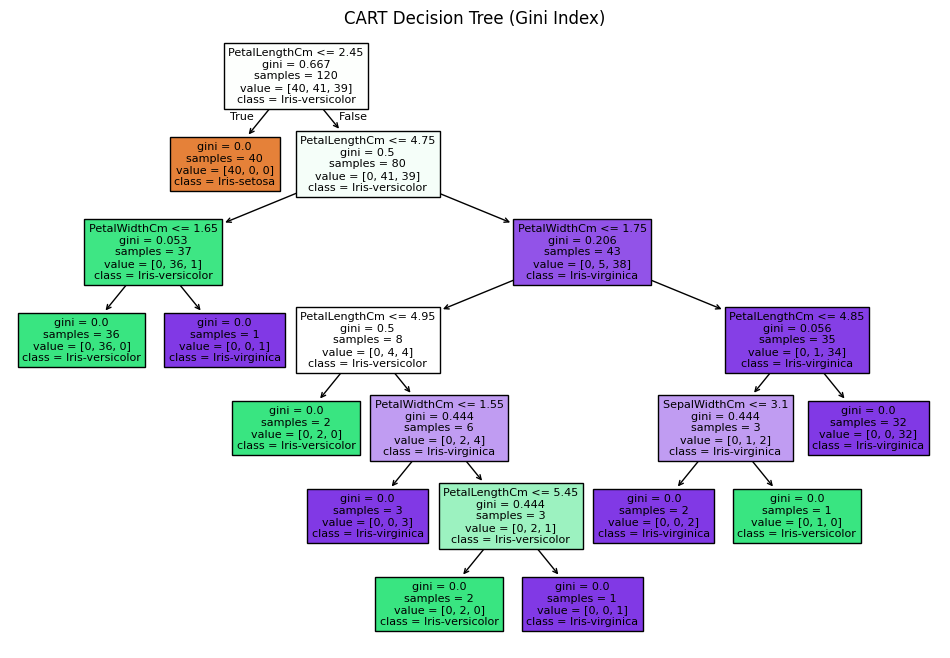

In [ ]:
# CART Tree Visualization
plt.figure(figsize=(12,8))
tree.plot_tree(cart_clf, feature_names=X.columns, class_names=[str(c) for c in class_names], filled=True)
plt.title("CART Decision Tree (Gini Index)")
plt.show()

# KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load CSV File
df = pd.read_csv('/content/Iris.csv')

# Step 2: Separate features and target label
# Modify 'label' to your actual target column name
X = df.drop(columns=['Species', 'Id'])  # Drop the target column to get features
y = df['Species']  # Target column

In [ ]:
# Step 3: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Implement KNN
# Define the KNN model with the number of neighbors (k)
k = 5  # You can change k to any other value
knn_clf = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_clf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test)

# Step 6: Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier Accuracy:", accuracy_knn)

# Detailed classification report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn, target_names=[str(c) for c in y.unique()]))


KNN Classifier Accuracy: 1.0
Classification Report for KNN:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Single Linkage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset from a CSV file
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# If the dataset includes labels (like 'species'), exclude them for clustering
X = df.drop(columns=['Species', 'Id'])  # assuming the last column is the species label

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

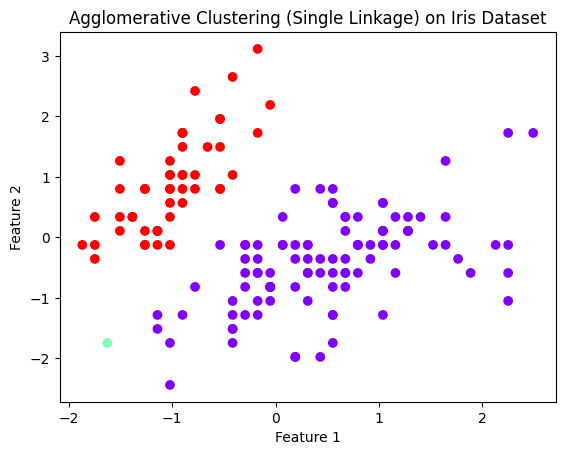

In [ ]:
# Apply Agglomerative Clustering with Single Linkage
agglom = AgglomerativeClustering(n_clusters=3, linkage='single')
y_pred = agglom.fit_predict(X_scaled)

# Plot the clusters (using the first two features for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='rainbow')
plt.title('Agglomerative Clustering (Single Linkage) on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

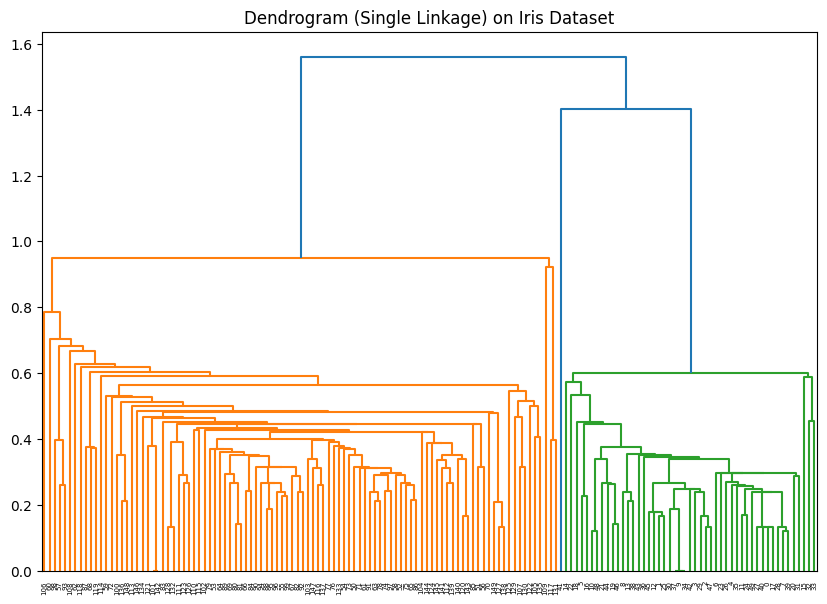

In [ ]:
# Plot the dendrogram
Z = linkage(X_scaled, method='single')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram (Single Linkage) on Iris Dataset')
plt.show()

# Complete Linkage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset from a CSV file
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# If the dataset includes labels (like 'species'), exclude them for clustering
X = df.drop(columns=['Species', 'Id'])  # assuming the last column is the species label

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

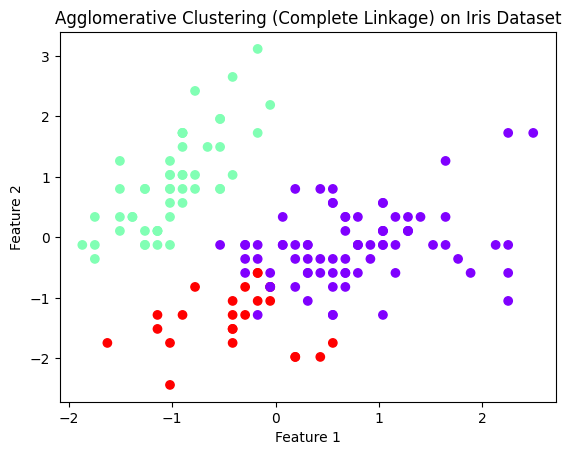

In [ ]:
# Apply Agglomerative Clustering with Complete Linkage
agglom = AgglomerativeClustering(n_clusters=3, linkage='complete')
y_pred = agglom.fit_predict(X_scaled)

# Plot the clusters (using the first two features for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='rainbow')
plt.title('Agglomerative Clustering (Complete Linkage) on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

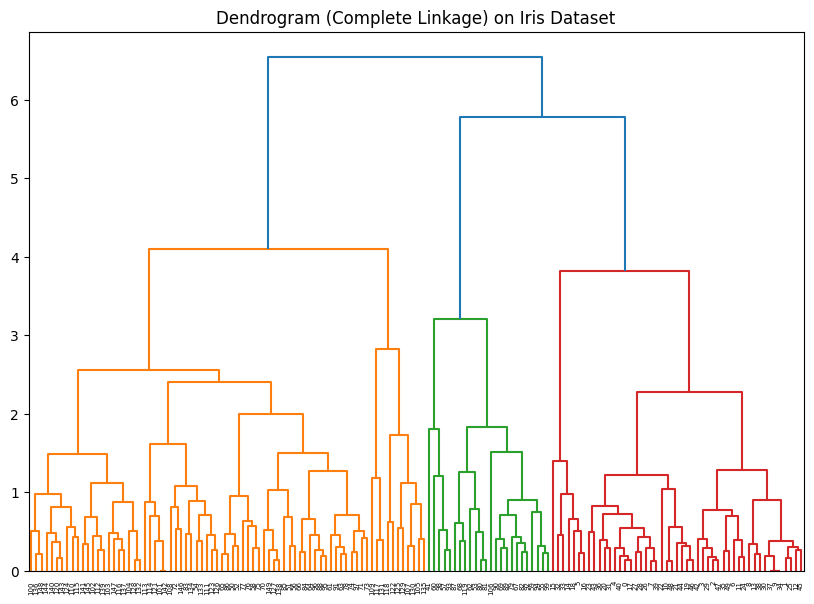

In [ ]:
# Plot the dendrogram
Z = linkage(X_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram (Complete Linkage) on Iris Dataset')
plt.show()

# Average Linkage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset from a CSV file
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# If the dataset includes labels (like 'species'), exclude them for clustering
X = df.drop(columns=['Species', 'Id'])  # assuming the last column is the species label

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

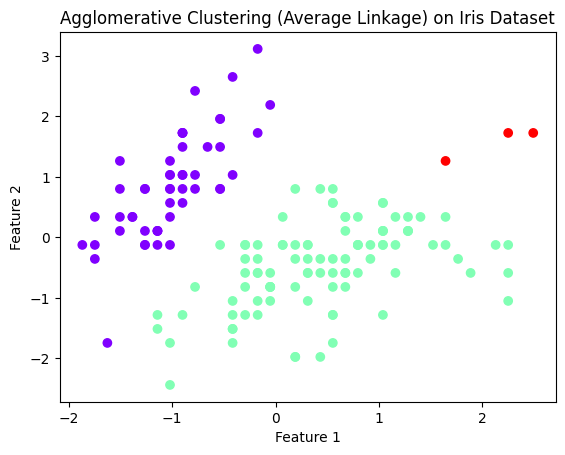

In [ ]:
# Apply Agglomerative Clustering with Average Linkage
agglom = AgglomerativeClustering(n_clusters=3, linkage='average')
y_pred = agglom.fit_predict(X_scaled)

# Plot the clusters (using the first two features for 2D visualization)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='rainbow')
plt.title('Agglomerative Clustering (Average Linkage) on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

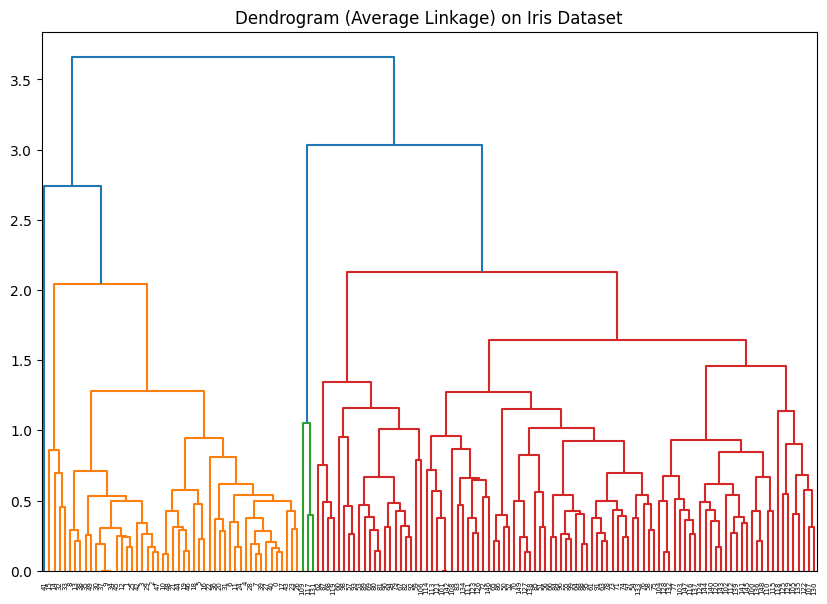

In [ ]:
# Plot the dendrogram
Z = linkage(X_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram (Average Linkage) on Iris Dataset')
plt.show()

# K Means

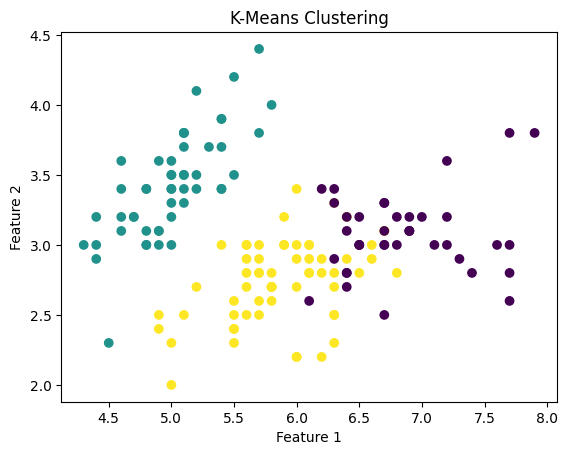

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data

# Initialize KMeans with 3 clusters
model = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict the cluster labels
y_pred = model.fit_predict(X)

# Plot the results (2D projection for visualization)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


# Intersection of two posting lists using 2 pointer approach

In [ ]:
def intersection(list1, list2):
  result=[]
  i, j = 0, 0
  while i < len(list1) and j < len(list2):
    if list1[i] == list2[j]:
      result.append(list1[i])
      i += 1
      j += 1
    elif list1[i] < list2[j]:
      i += 1
    else:
      j += 1
  return result

In [ ]:
list1 = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
list2 = [3, 6, 7, 12, 16, 18, 22, 27]

res = intersection(list1, list2)

print(f"Posting List 1 is: {list1}")
print(f"Posting List 2 is: {list2}")
print(f"Intersection of the two posting lists is: {res}")

Posting List 1 is: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
Posting List 2 is: [3, 6, 7, 12, 16, 18, 22, 27]
Intersection of the two posting lists is: [7, 16, 22]


# Intersection of two posting lists using skip pointer approach

In [ ]:
import math

def skip_pointers(posting_list):
  length = len(posting_list)
  skip_interval = int(math.sqrt(length))
  skip = [None] * length

  for i in range(0, length, skip_interval):
    if i + skip_interval <length:
      skip[i] = i + skip_interval

  return skip



def intersection_using_skip_pointers(list1, list2, skip1, skip2):
  result = []
  i, j = 0, 0
  while i < len(list1) and j < len(list2):
    if list1[i] == list2[j]:
      result.append(list1[i])
      i += 1
      j += 1
    elif list1[i]<list2[j]:
      # using skip pointer for list1
      if skip1[i] is not None and list1[skip1[i]] <= list2[j]:
        print(f"Skipping from {list1[i]} to {list1[skip1[i]]} in list1")
        i = skip1[i]
      else:
        i += 1
    else:
      # Using skip pointer for list2
      if skip2[j] is not None and list2[skip2[j]] <= list1[i]:
        print(f"Skipping from {list2[j]} to {list2[skip2[j]]} in list2")
        j = skip2[j]
      else:
        j += 1

  return result

In [ ]:
list1 = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
list2 = [3, 6, 7, 12, 16, 18, 22, 27]

# Build skip pointers for both lists
skip1 = skip_pointers(list1)
skip2 = skip_pointers(list2)

# Perform intersection using skip pointers
result = intersection_using_skip_pointers(list1, list2, skip1, skip2)

print(f"Posting List 1 is: {list1}")
print(f"Posting List 2 is: {list2}")
print(f"Intersection of the two posting lists is: {result}")

Posting List 1 is: [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
Posting List 2 is: [3, 6, 7, 12, 16, 18, 22, 27]
Intersection of the two posting lists is: [7, 16, 22]


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Sample corpus (list of documents)
corpus = [
    "shipment of gold damaged in a fire",
    "delivery of silver arrived in a silver truck",
    "shipment of gold arrived in a truck"
]

# Query string
query = "gold silver truck"

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the model on the corpus and transform the corpus to TF-IDF matrix
X = vectorizer.fit_transform(corpus)

# Transform the query string into a TF-IDF vector
query_vector = vectorizer.transform([query])

# Compute the dot product of the query vector with each document vector
scores = X @ query_vector.T

# Convert to dense format for display
tfidf_matrix = X.toarray()
query_tfidf_vector = query_vector.toarray()

print("TF-IDF Matrix (Corpus):")
print(tfidf_matrix)

print("\nQuery TF-IDF Vector:")
print(query_tfidf_vector)

# Display feature names (terms in the vocabulary)
print("\nFeature Names (Vocabulary):")
print(vectorizer.get_feature_names_out())

# Display similarity scores
print("\nSimilarity Scores (Query with each document):")
print(scores.toarray())



TF-IDF Matrix (Corpus):
[[0.         0.50935267 0.         0.50935267 0.38737583 0.30083189
  0.30083189 0.38737583 0.         0.        ]
 [0.29048754 0.         0.38195621 0.         0.         0.22558949
  0.22558949 0.         0.76391242 0.29048754]
 [0.43826859 0.         0.         0.         0.43826859 0.34035465
  0.34035465 0.43826859 0.         0.43826859]]

Query TF-IDF Vector:
[[0.         0.         0.         0.         0.51785612 0.
  0.         0.         0.68091856 0.51785612]]

Feature Names (Vocabulary):
['arrived' 'damaged' 'delivery' 'fire' 'gold' 'in' 'of' 'shipment'
 'silver' 'truck']

Similarity Scores (Query with each document):
[[0.20060494]
 [0.6705929 ]
 [0.45392014]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (list of documents)
corpus = [
    'the cat in the hat',
    'the quick brown fox',
    'the lazy dog'
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the model and transform the corpus to TF-IDF matrix
X = vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a dense format and display it
tfidf_matrix = X.toarray()
print("TF-IDF Matrix:")
print(tfidf_matrix)

# Display feature names (terms in the vocabulary)
print("\nFeature Names (Vocabulary):")
print(vectorizer.get_feature_names_out())


TF-IDF Matrix:
[[0.         0.4769856  0.         0.         0.4769856  0.4769856
  0.         0.         0.56343076]
 [0.54645401 0.         0.         0.54645401 0.         0.
  0.         0.54645401 0.32274454]
 [0.         0.         0.65249088 0.         0.         0.
  0.65249088 0.         0.38537163]]

Feature Names (Vocabulary):
['brown' 'cat' 'dog' 'fox' 'hat' 'in' 'lazy' 'quick' 'the']


In [ ]:
import math

# Step 1: Calculate Term Frequency (TF)
def compute_tf(word_dict, document):
    tf_dict = {}
    document_count = len(document)
    for word, count in word_dict.items():
        tf_dict[word] = count / float(document_count)  # TF calculation
    return tf_dict

# Step 2: Calculate Inverse Document Frequency (IDF)
def compute_idf(documents):
    N = len(documents)  # Total number of documents
    idf_dict = {}

    for document in documents:
        for word in document:
            if word not in idf_dict:
                idf_dict[word] = 0

    for document in documents:
        for word in document:
            if document[word] > 0:  # If the word exists in the document
                idf_dict[word] += 1  # Increment count of documents containing the word

    for word, val in idf_dict.items():  # Calculate IDF for each word
        idf_dict[word] = math.log2(N / float(val))  # IDF = log(Total Documents / Documents containing the word)
    return idf_dict

# Step 3: Calculate TF-IDF
def compute_tf_idf(tf, idf):
    tf_idf = {}
    for word, val in tf.items():
        if word in idf:  # Only calculate TF-IDF for words found in the IDF dictionary
            tf_idf[word] = val * idf[word]  # TF-IDF calculation
        else:
            tf_idf[word] = 0  # If the word doesn't exist in the IDF dict, set TF-IDF to 0
    return tf_idf

# Helper function to create word dictionary from document
def create_word_dict(doc):
    word_dict = {}
    for word in doc.split():
        word_dict[word] = word_dict.get(word, 0) + 1
    return word_dict

# Function to calculate query TF-IDF score for a document
def calculate_query_score(query_tf_idf, doc_tf_idf):
    score = 0.0
    for word in query_tf_idf:
        if word in doc_tf_idf:  # Check if word in query exists in the document
            score += query_tf_idf[word] * doc_tf_idf[word]  # Sum the TF-IDF product
    return score

# Sample documents (corpus)
doc1 = "shipment of gold damaged in a fire"
doc2 = "delivery of silver arrived in a silver truck"
doc3 = "shipment of gold arrived in a truck"

# List of all documents
documents = [doc1, doc2, doc3]

# Preprocess documents: Create word count dictionaries for each document
word_dicts = [create_word_dict(doc) for doc in documents]

# Calculate TF for each document in the corpus
tf_docs = [compute_tf(word_dict, doc.split()) for word_dict, doc in zip(word_dicts, documents)]

# Calculate IDF across all documents
idf = compute_idf(word_dicts)

# Calculate TF-IDF for each document
tf_idf_docs = [compute_tf_idf(tf, idf) for tf in tf_docs]

# Given query to analyze
query = "gold silver truck"

# Preprocess the query: Create a word count dictionary for the query
query_word_dict = create_word_dict(query)

# Calculate TF for the query
tf_query = compute_tf(query_word_dict, query.split())

# Calculate TF-IDF for the query using the corpus IDF
tf_idf_query = compute_tf_idf(tf_query, idf)

# Print TF-IDF for each word in each document
print("TF-IDF scores for each word in each document:")
for i, doc_tf_idf in enumerate(tf_idf_docs):
    print(f"\nDocument {i + 1}:")
    for word, score in doc_tf_idf.items():
        print(f"{word}: {score:.4f}")

# Calculate the score of each document based on query TF-IDF and print the scores
print("\nTF-IDF of the query with respect to each document:")
document_scores = []
for i, doc_tf_idf in enumerate(tf_idf_docs):
    score = calculate_query_score(tf_idf_query, doc_tf_idf)
    document_scores.append((i + 1, score))  # Store document number and its score
    print(f"Document {i + 1} Query TF-IDF Score: {score:.4f}")

# Sort documents by score in descending order
ranked_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)

# Display ranked documents with their scores
print("\nDocuments ranked based on relevance to the query:")
for doc_num, score in ranked_documents:
    print(f"Document {doc_num}: Score = {score:.4f}")


TF-IDF scores for each word in each document:

Document 1:
shipment: 0.0836
of: 0.0000
gold: 0.0836
damaged: 0.2264
in: 0.0000
a: 0.0000
fire: 0.2264

Document 2:
delivery: 0.1981
of: 0.0000
silver: 0.3962
arrived: 0.0731
in: 0.0000
a: 0.0000
truck: 0.0731

Document 3:
shipment: 0.0836
of: 0.0000
gold: 0.0836
arrived: 0.0836
in: 0.0000
a: 0.0000
truck: 0.0836

TF-IDF of the query with respect to each document:
Document 1 Query TF-IDF Score: 0.0163
Document 2 Query TF-IDF Score: 0.2236
Document 3 Query TF-IDF Score: 0.0326

Documents ranked based on relevance to the query:
Document 2: Score = 0.2236
Document 3: Score = 0.0326
Document 1: Score = 0.0163
